In [1]:
import numpy as np
from DataPreparation import read_data, basic_info, prior_distribution, features_histograms, convey_insights
from DataPreparation import visualize_continuous_data,  visualize_categorical_data, HoeffdingCheck
from CovarianceAnalysis import CorrelationMatrix

### Read the Data

In [2]:
x_train_d, y_train_d= read_data(standardize=True)

# show top 5 rows of the dataset
x_train_d.head()

Gender       Age    Height    Weight H_Cal_Consump  Veg_Consump  \
0    Female -0.275676  0.220368 -1.318999           yes     0.446650   
121    Male -1.012536  1.481998 -1.010047           yes     1.069125   
122    Male -0.994835  0.398734 -1.354383           yes    -0.983943   
123  Female -0.900638 -0.973097 -1.670038           yes     0.877825   
124  Female -0.794129 -1.274986 -1.590224            no     1.069125   

     Water_Consump Alcohol_Consump Smoking  Meal_Count Food_Between_Meals  \
0        -1.554084              no      no    0.402018         Frequently   
121      -0.008254              no      no    1.327880          Sometimes   
122      -0.073494       Sometimes      no    0.402018          Sometimes   
123       1.345200              no      no   -0.071614          Sometimes   
124      -1.222455       Sometimes      no    0.370861         Frequently   

    Fam_Hist H_Cal_Burn  Phys_Act  Time_E_Dev              Transport  
0        yes         no -0.270707    1.224847  Public_Transportation  
121      yes         no  1.157412   -0.439540             Automobile  
122      yes         no -0.595022    0.826991  Public_Transportation  
123       no        yes  1.096729    0.995770  Public_Transportation  
124       no        yes -0.051376   -1.075136  Public_Transportation

### Basic information about the data

In [3]:
basic_info(x_train_d, y_train_d)

### Investigate Feature Distributions

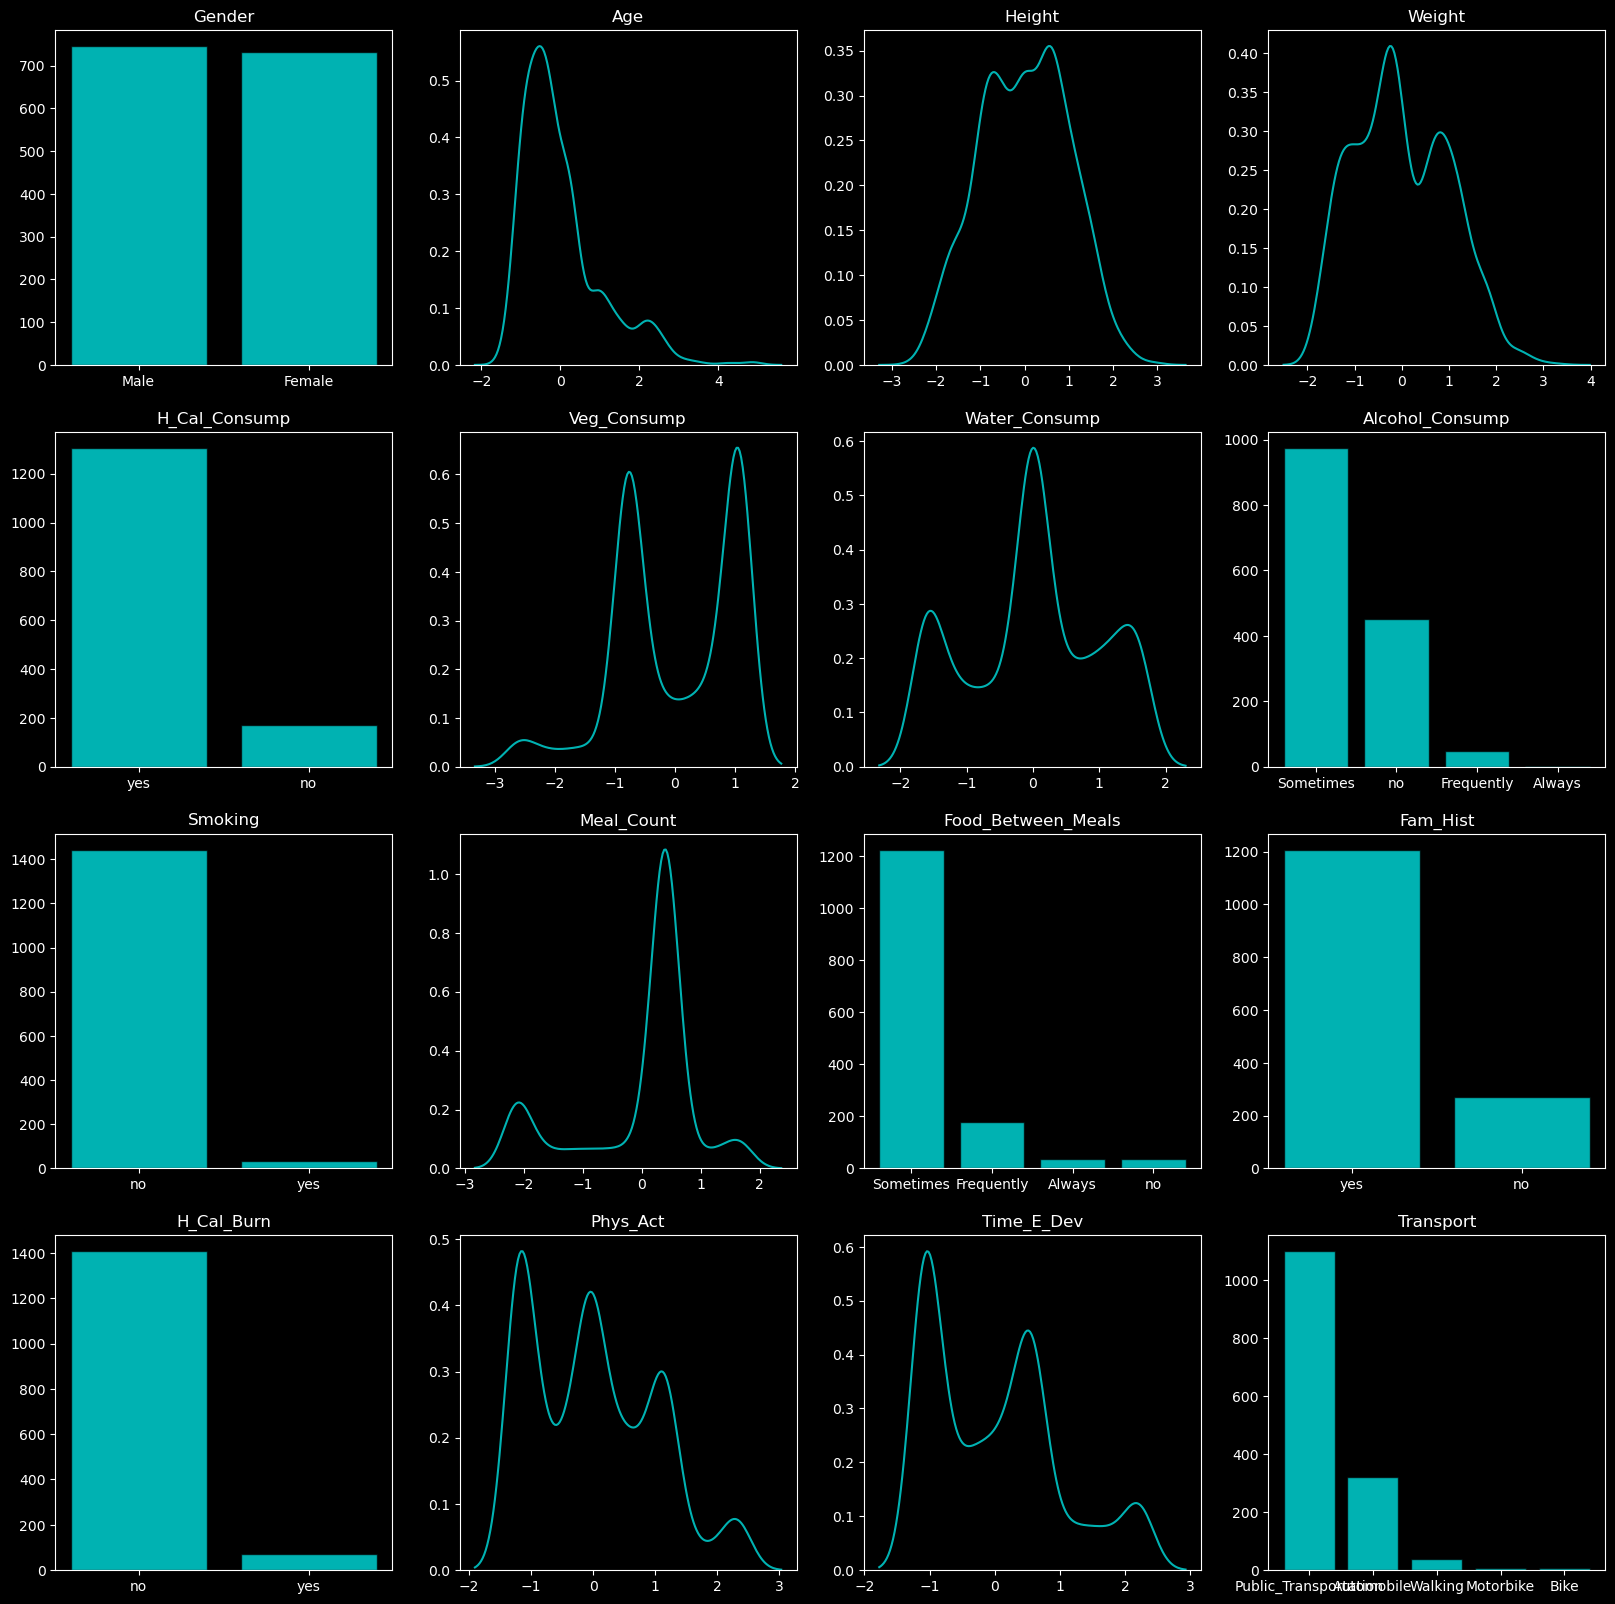

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Most categorical features besides gender suffer high imbalance. Especially, H_Cal_Cons, H_Cal_Burn, Smoking, <br><br><font color="pink">✦</font> Most continuous distributions are multimodal<br><br><font color="pink">✦</font> There don't seem to be any outliers<br><br></font>

In [4]:
features_histograms(x_train_d)
convey_insights([
    "Most categorical features besides gender suffer high imbalance. Especially, H_Cal_Cons, H_Cal_Burn, Smoking, ",
    "Most continuous distributions are multimodal",
    "There don't seem to be any outliers",
])

### Investigate Class Imbalance

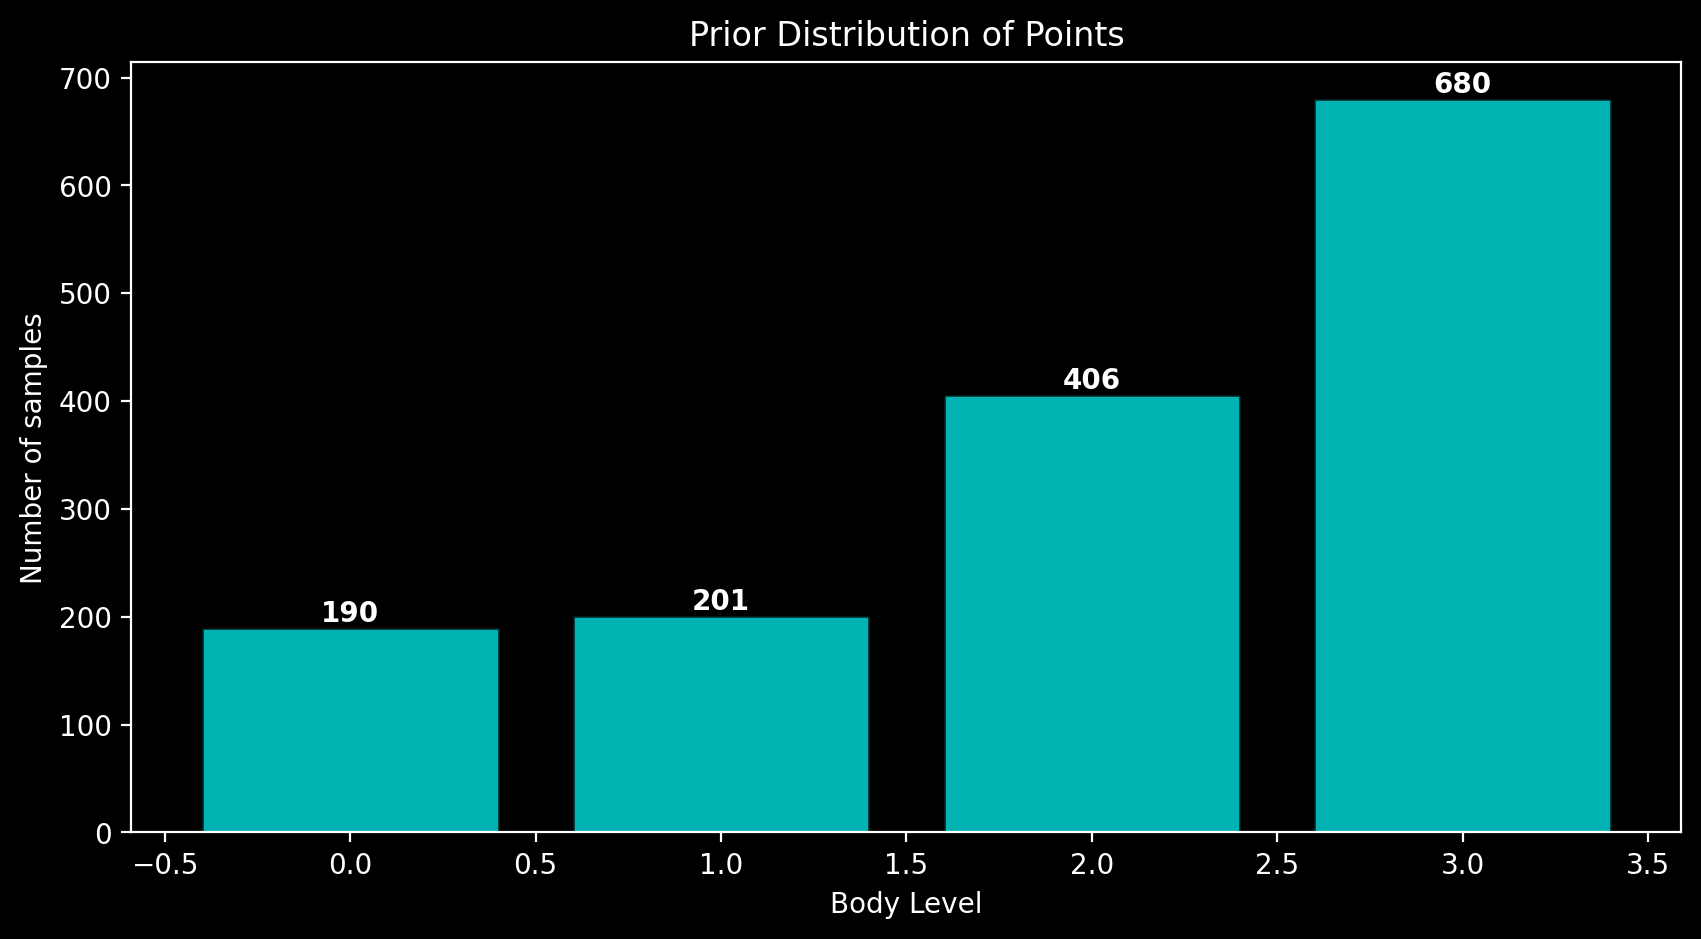

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> There is a clear imbalance in the number of classes. Many models can be sensitive to such imbalance. <br><br></font>

In [5]:
prior_distribution(y_train_d)
convey_insights([
    "There is a clear imbalance in the number of classes. Many models can be sensitive to such imbalance. ",
])

### Analyze potential in the continuous features

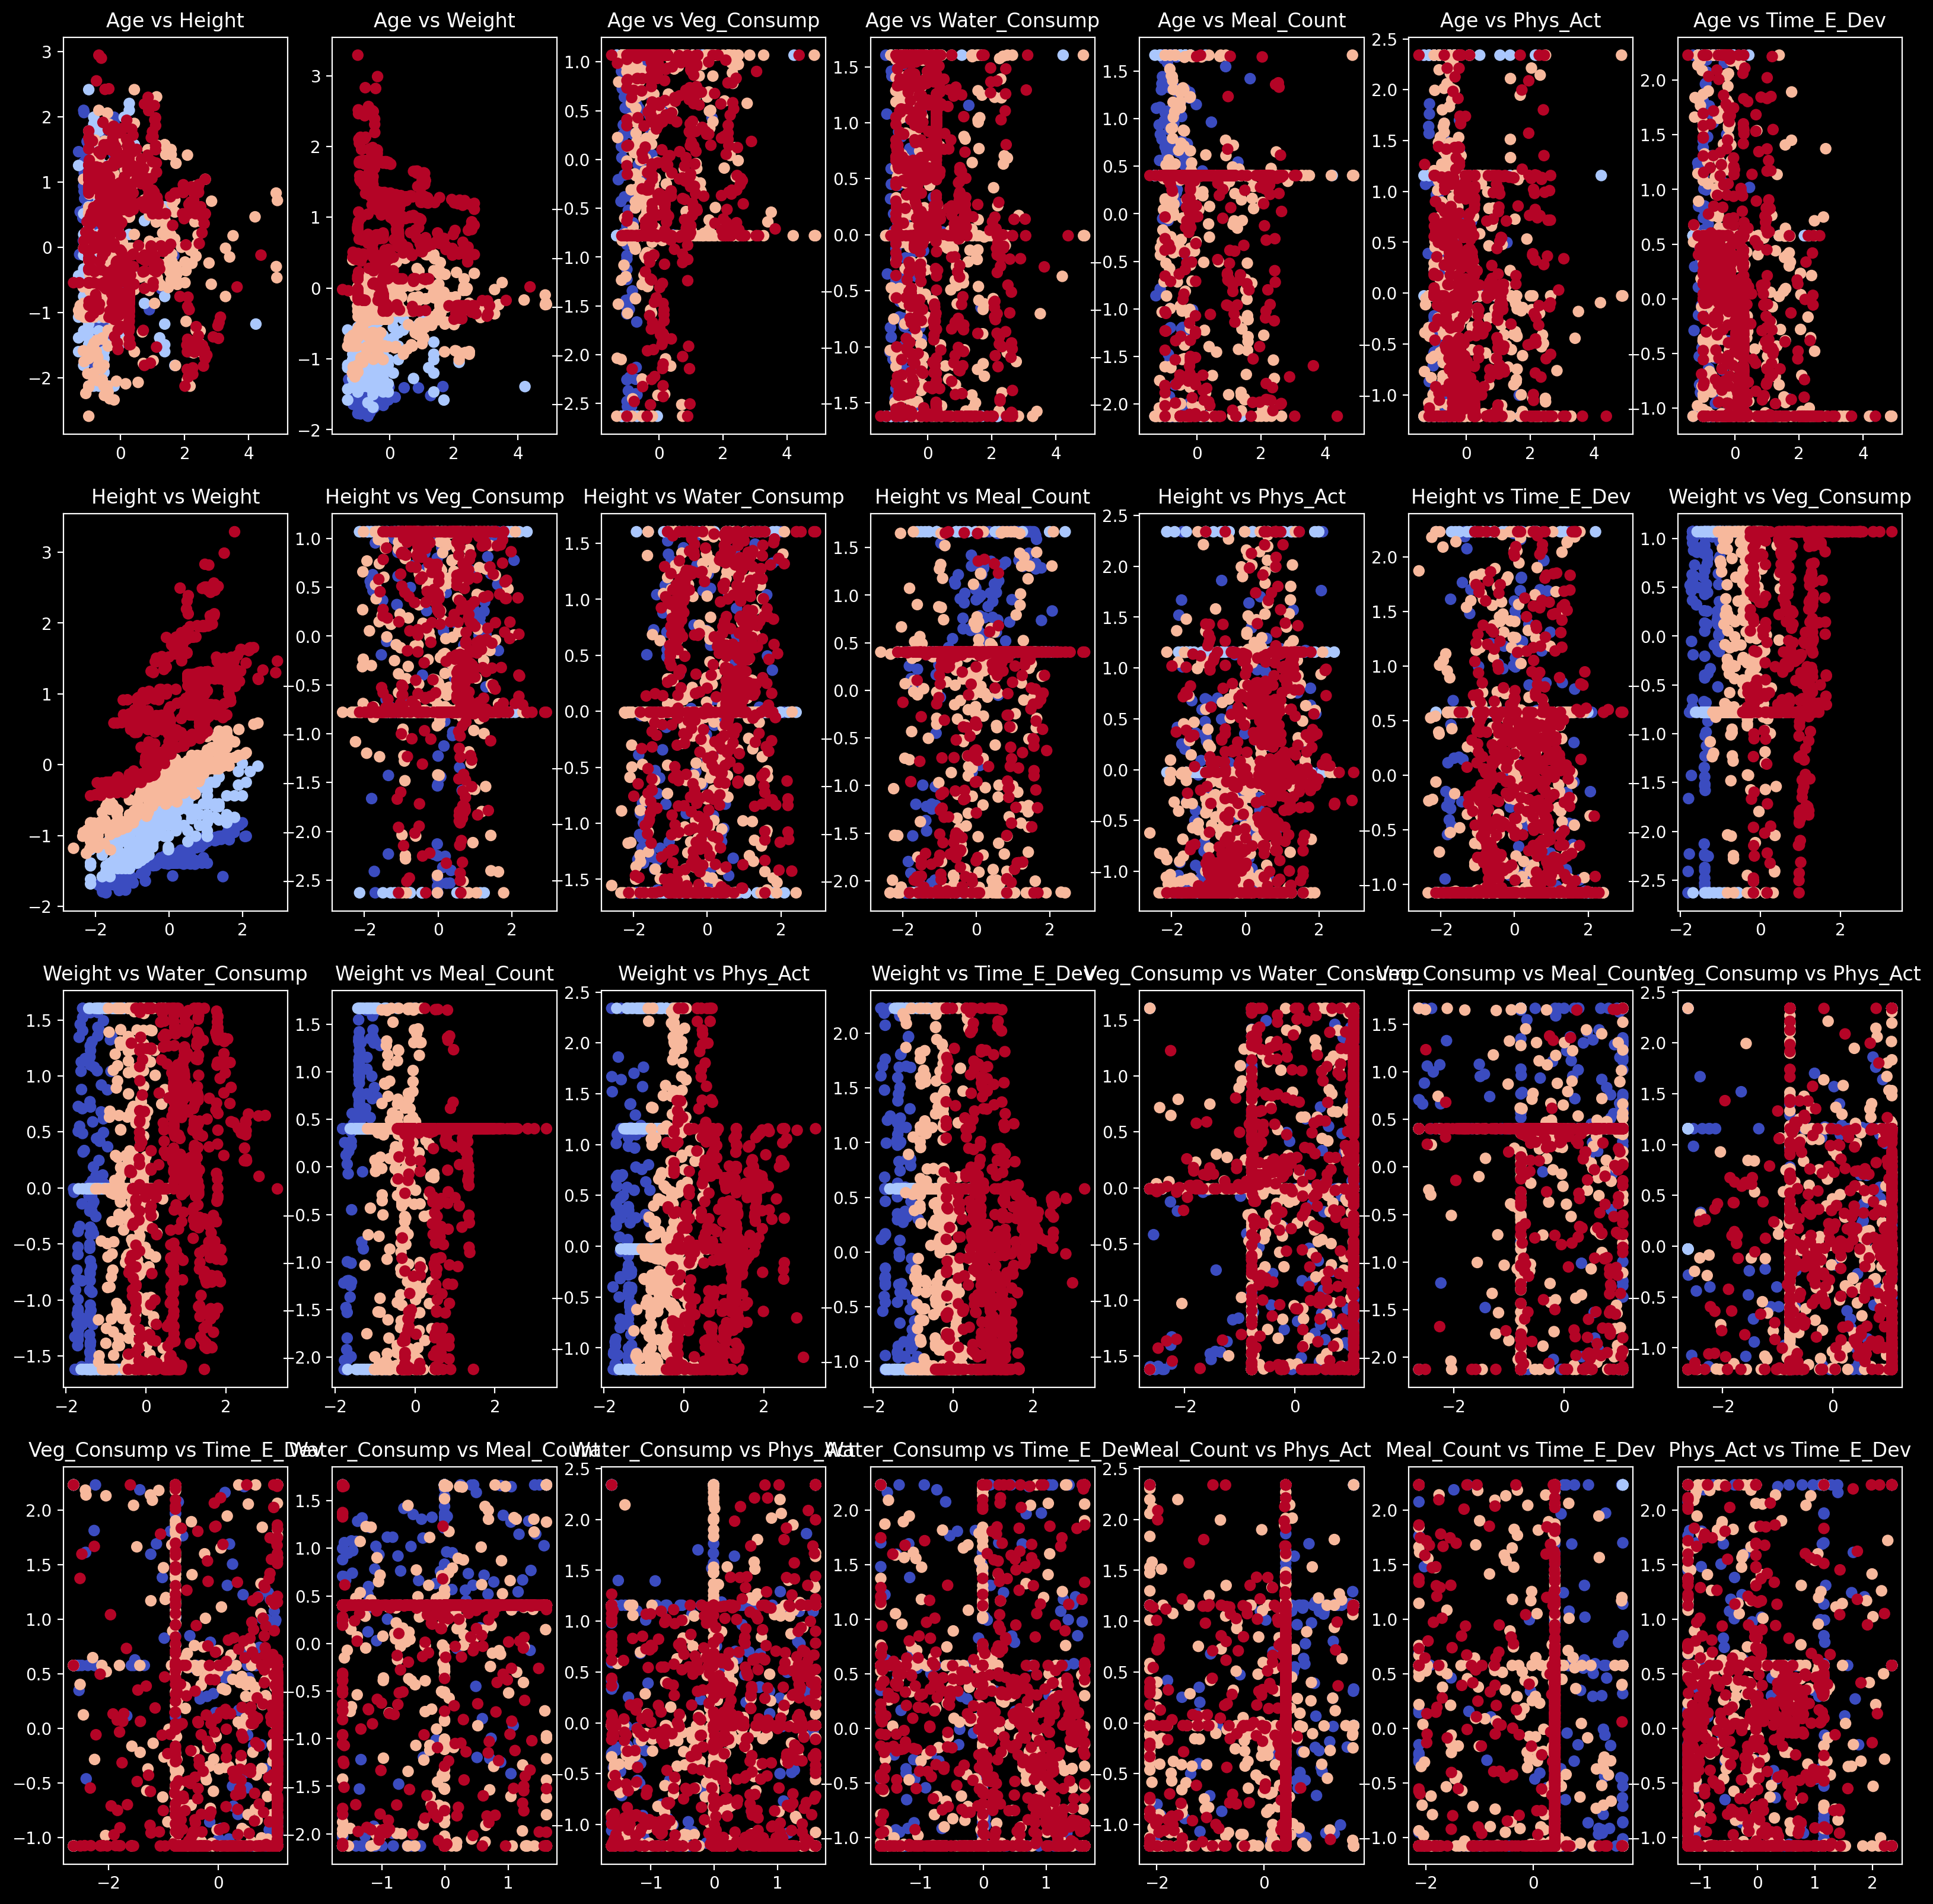

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Most continuous feature pairs don't linearly separate the data <br><br><font color="pink">✦</font> Weight seems to have the nicest interaction with other features and a spectacular interaction with height<br><br><font color="pink">✦</font> Linear models should stand a chance<br><br></font>

In [6]:
visualize_continuous_data(x_train_d, y_train_d)

convey_insights([
    "Most continuous feature pairs don't linearly separate the data ",
    "Weight seems to have the nicest interaction with other features and a spectacular interaction with height",
    "Linear models should stand a chance"
])

### Analyze potential in the categorical features

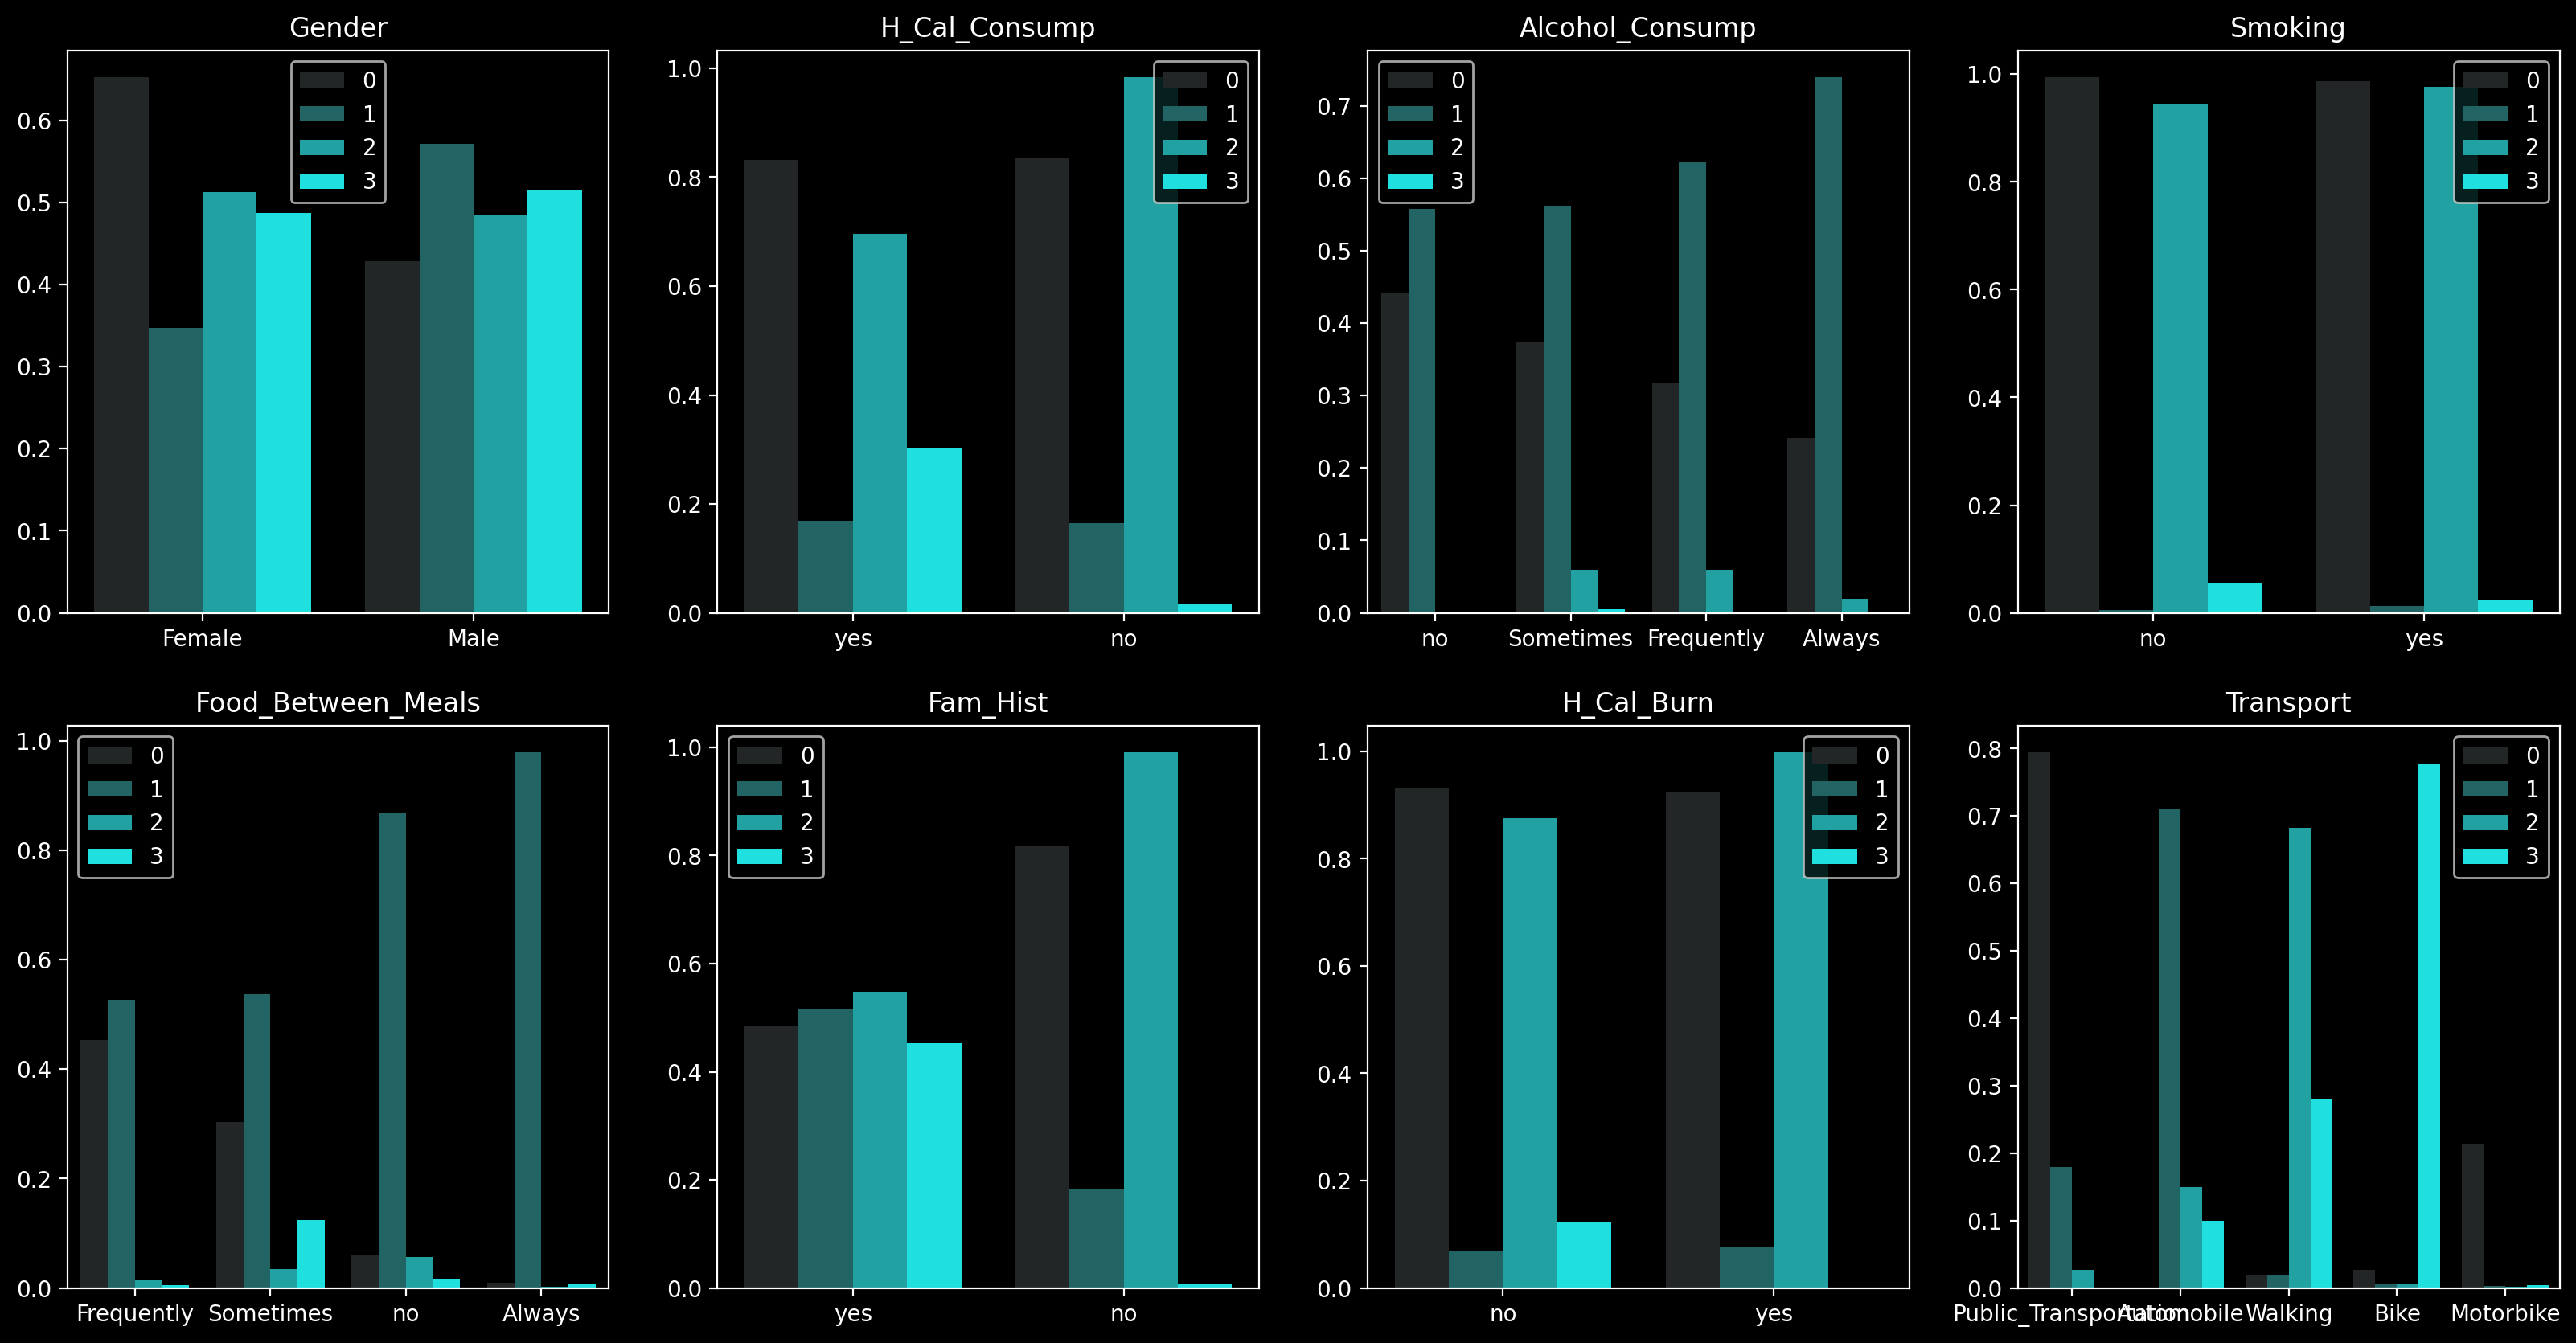

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Categorical variables such as gender and smoking don't seem too relevant to the target variable<br><br><font color="pink">✦</font> Distributions strongly vary for Food_Between_Meals and Transport between the two classes<br><br><font color="pink">✦</font> Although it may seem that we can draw decision rules such as 'if Food_Between_Meals > a then class = 1',
    the support of the group is too small for it to be statistically significant as shown above.<br><br></font>

In [7]:
visualize_categorical_data(x_train_d, y_train_d, normalize=True)
convey_insights([
    "Categorical variables such as gender and smoking don't seem too relevant to the target variable",
    "Distributions strongly vary for Food_Between_Meals and Transport between the two classes",
    """Although it may seem that we can draw decision rules such as 'if Food_Between_Meals > a then class = 1',
    the support of the group is too small for it to be statistically significant as shown above.""",
])

### Analyze correlation between features

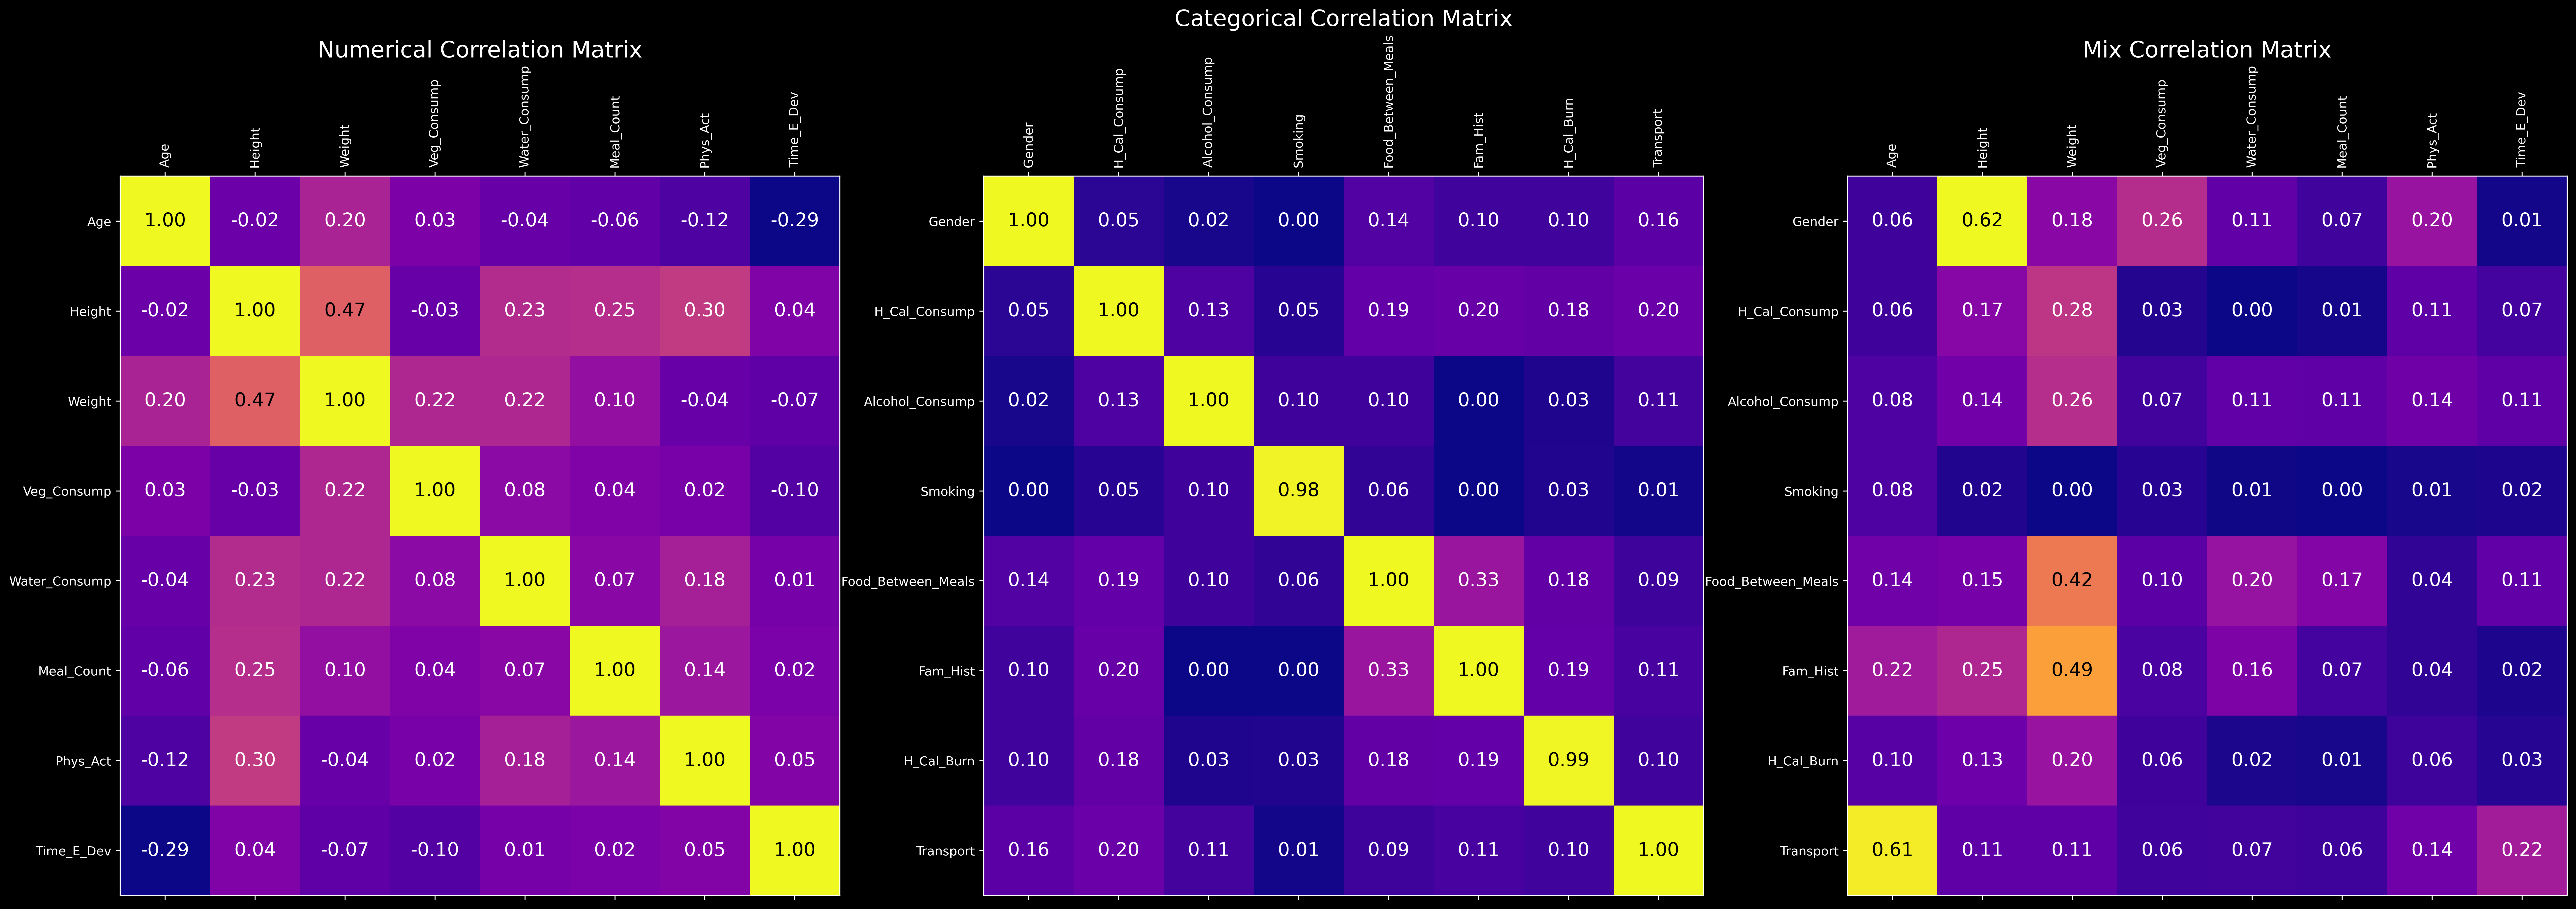

<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> No serious correlations between numerical features but taller people tend to be heavier and tend to do more exercise<br><br><font color="pink">✦</font> Categorical features are mostly uncorrelated<br><br><font color="pink">✦</font> There is a correlation between Age and the transport used. Also between weight and family history and food between meals<br><br></font>

In [8]:
CorrelationMatrix(x_train_d).plot_correlation_matrices()
convey_insights([
    "No serious correlations between numerical features but taller people tend to be heavier and tend to do more exercise",
    "Categorical features are mostly uncorrelated",
    "There is a correlation between Age and the transport used. Also between weight and family history and food between meals",
])

### Validation Set Size

In [9]:
x_data_d, y_data_d = read_data(split="all")
meh = HoeffdingCheck(x_data_d, ratio=0.2, ϵ = 0.06)
print(meh)
convey_insights([
    "Dataset sadly doesn't offer serious generalization guarantees due to its size",
])



<font size=4>Hoeffding's Inequality states:
                    $$P[|E_{out}(g)-E_{test}(g)| \leq \epsilon] \geq 1-2e^{-2N_{test}\epsilon^2}$$
                    If we use validation set of size $0.2N_{train}=295$ then with $\epsilon=0.06$ we have 
                    $$P[|E_{out}(g)-E_{test}(g)| \leq 0.06] \geq 0.761$$
                    In other words, 
                    with probability at least $0.761$, the generalization error of our model will be at most 0.06 given a validation set of size 295.
                    </font>
                    

<font size=4>Hoeffding's Inequality states:
                    $$P[|E_{out}(g)-E_{test}(g)| \leq \epsilon] \geq 1-2e^{-2N_{test}\epsilon^2}$$
                    If we use validation set of size $0.2N_{train}=295$ then with $\epsilon=0.06$ we have 
                    $$P[|E_{out}(g)-E_{test}(g)| \leq 0.06] \geq 0.761$$
                    In other words, 
                    with probability at least $0.761$, the generalization error of our model will be at most 0.06 given a validation set of size 295.
                    </font>
                    


<h3><font color="pink" size=5>Insights</font></h3> <font size=4>
<font color="pink">✦</font> Dataset sadly doesn't offer serious generalization guarantees due to its size<br><br></font>